In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import interp1d
from scipy.optimize import root

In [9]:
common_settings = {
'omega_b':0.0223828,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mTk, vTk, mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
'z_max_pk':1000,
'format':'class',
}

In [10]:
chiCDM = Class()
# pass input parameters
Mnu=0.1
chiCDM.set(common_settings)
aNR=1.e-3
f_chi=0.3
print(f'aNR={aNR},zNR={1/aNR -1}')
chiCDM.set({
'N_ur': 3.046,
'f_chi':f_chi,
'acs_chi':aNR,
'cs2_peak_chi':1./3.,
# 'T_cmb':1.8,
})
chiCDM.compute()


aNR=0.001,zNR=999.0
Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
 -> age = 13.091386 Gyr
 -> conformal age = 13186.097101 Mpc
 -> N_eff = 3.046 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 4067.337376
    corresponding to conformal time = 94.379418 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cold Dark Matter               Omega = 0.261206        , omega = 0.120107       
-> Dark Matter with sound speed:  Omega = 0.0602782       , omega = 0.0277171      
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.72044e-05     , omega = 1.71073e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = 0.629748        , omega = 0.28957     

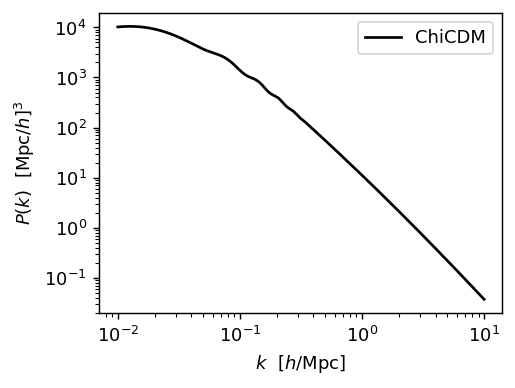

In [33]:
from scipy.interpolate import interp1d

kk = np.logspace(-2,1,500) # k in h/Mpc
Pkchi = [] # P(k) in (Mpc/h)**3
h = chiCDM.h() # get reduced Hubble for conversions to 1/Mpc

lowz=0.

for k in kk:
    Pkchi.append(chiCDM.pk_lin(k*h,lowz)*h**3) # function .pk(k,z)

Pkchi=np.array(Pkchi)
chi_tk_z= chiCDM.get_transfer(z=lowz)


kidx=70
ktrans=chi_tk_z['k (h/Mpc)']

Pchi_int = interp1d(kk, Pkchi, fill_value='extrapolate')
plt.figure(figsize=(4,3), dpi=130)
plt.xscale('log');plt.yscale('log');
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pkchi,'k-',label=r'ChiCDM')
plt.legend()
plt.show()

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_chi', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_cdm', 't_ur', 't_chi', 't_tot'])


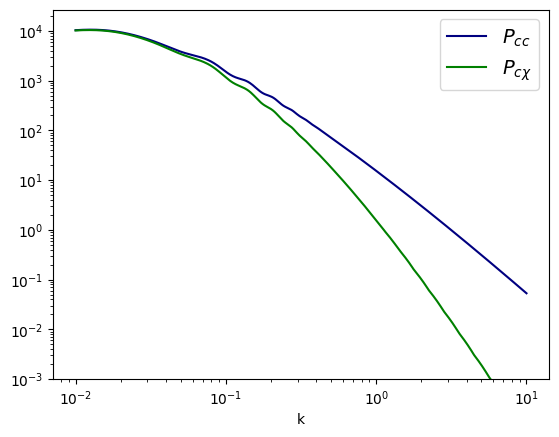

In [44]:
print(chi_tk_z.keys())
d_m=-chi_tk_z['d_m']

d_chi=-chi_tk_z['d_chi']
T_ratio =d_chi/ d_m
T_ratiochi_int = interp1d(ktrans, T_ratio, fill_value='extrapolate')

d_cdm=-chi_tk_z['d_cdm']
T_ratio =d_cdm/ d_m
T_ratiocdm_int = interp1d(ktrans, T_ratio, fill_value='extrapolate')

# plt.plot(kk,T_ratio_int(kk))
plt.plot(kk,Pkchi*T_ratiocdm_int(kk)*T_ratiocdm_int(kk),'navy',label=r'$P_{cc}$')
plt.plot(kk,Pkchi*T_ratiocdm_int(kk)*T_ratiochi_int(kk),'g-',label=r'$P_{c\chi}$')
# plt.plot(kk,Pkchi*T_ratiochi_int(kk)*T_ratiochi_int(kk),'darkred',label=r'$P_{\chi\chi}$')

plt.yscale('log')
plt.ylim([1.e-3,None])

plt.xscale('log')
plt.legend(fontsize=14)
plt.xlabel('k')
plt.show()